In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

In [89]:
house_price_dataset = fetch_california_housing()

In [90]:
print(house_price_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [91]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)
house_price_dataframe['price'] = house_price_dataset.target
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
house_price_dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [93]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


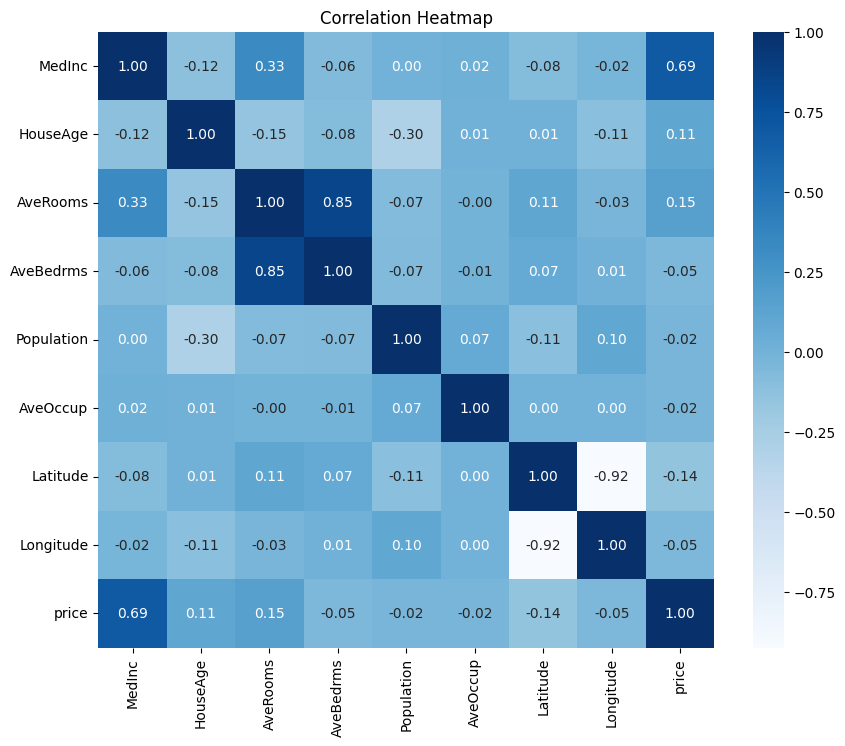

In [94]:
plt.figure(figsize=(10, 8))
correlation = house_price_dataframe.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='Blues', square=True)
plt.title("Correlation Heatmap")
plt.show()

In [95]:
X = house_price_dataframe.drop('price', axis=1)
Y = house_price_dataframe['price']
print(X.shape, Y.shape)

(20640, 8) (20640,)


In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16512, 8) (4128, 8)


In [97]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [98]:
training_data_prediction = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Training R2 Score:", r2_train)
print("Training MAE:", mae_train)

Training R2 Score: 0.8981705426565916
Training MAE: 0.2564168801002256


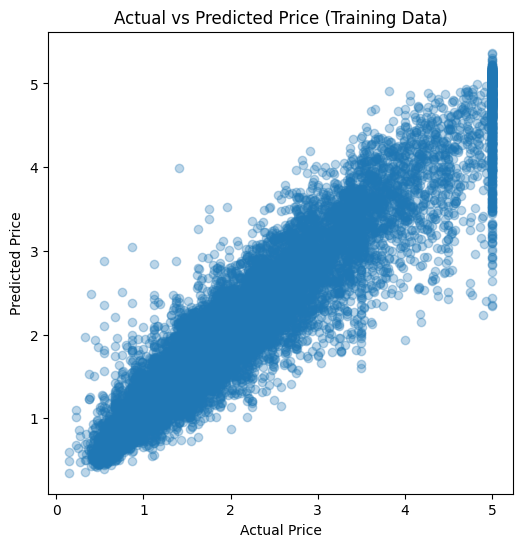

In [99]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_train, training_data_prediction, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Training Data)")
plt.show()

In [100]:
test_data_prediction = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Test R2 Score:", r2_test)
print("Test MAE:", mae_test)

Test R2 Score: 0.8265714813208984
Test MAE: 0.3154509897767458


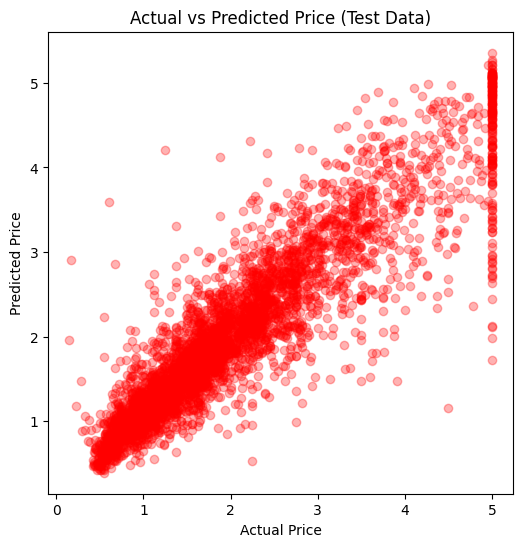

In [101]:
plt.figure(figsize=(6, 6))
plt.scatter(Y_test, test_data_prediction, alpha=0.3, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Test Data)")
plt.show()

In [102]:
example_house = np.array([[5, 25, 6, 1, 1500, 3, 34, -118]])  # Custom example
predicted_price = model.predict(example_house)
print("Predicted Price for example house:", predicted_price[0])

Predicted Price for example house: 2.20889
